In [ ]:
import numpy as np

# "Hesse" field
# https://github.com/antyeates1983/flhtools

def Bx(x, y, z):
    return x*0 - 2

def By(x, y, z, t=2):
    return -z - t*(1 - z**2)/(1 + z**2/25)**2/(1 + x**2/25)

def Bz(x, y, z):
    return y

nx = 128
ny = 64
nz = 32
x1 = np.linspace(-20, 20, nx)
y1 = np.linspace(-20, 20, ny)
z1 = np.linspace(  0, 40, nz)
x, y, z = np.meshgrid(x1, y1, z1, indexing='ij')

Bx = Bx(x, y, z)
By = By(x, y, z)
Bz = Bz(x, y, z)

b = np.stack([Bx, By, Bz], axis=-1)
b.shape

(128, 64, 32, 3)

<matplotlib.colorbar.Colorbar>

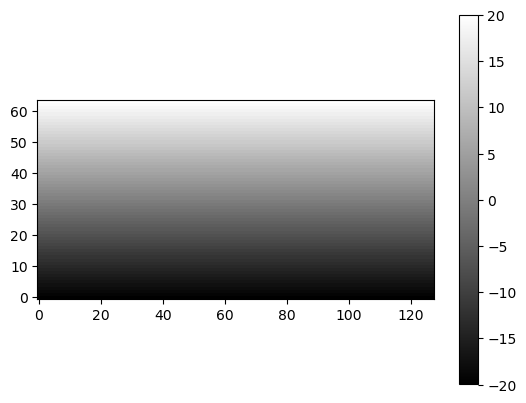

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(b[:, :, 0, 2].T, origin='lower', cmap='gray',
           vmin=-20, vmax=20)
plt.colorbar()

In [ ]:
from magplot.base import create_mesh, mag_plotter

bx = b[:, :, :, 0]
by = b[:, :, :, 1]
bz = b[:, :, :, 2]

mesh = create_mesh(bx, by, bz)
mesh

StructuredGrid (0x7f9154530940)
  N Cells:      248031
  N Points:     262144
  X Bounds:     0.000e+00, 1.270e+02
  Y Bounds:     0.000e+00, 6.300e+01
  Z Bounds:     0.000e+00, 3.100e+01
  Dimensions:   128, 64, 32
  N Arrays:     2

In [ ]:
i_siz = 64
j_siz = 32
i_res = 8
j_res = 8
vmin = -20
vmax = 20
max_time = 10000

b_plot = mag_plotter(mesh)
b_tube, b_bottom, b_dargs = b_plot.create_mesh(i_siz=i_siz, j_siz=j_siz, 
                                               i_resolution=i_res, j_resolution=j_res, 
                                               vmin=vmin, vmax=vmax, 
                                               max_time=max_time)

In [ ]:
import pyvista as pv
pv.set_jupyter_backend('static')
pv.global_theme.notebook = True
pv.start_xvfb()

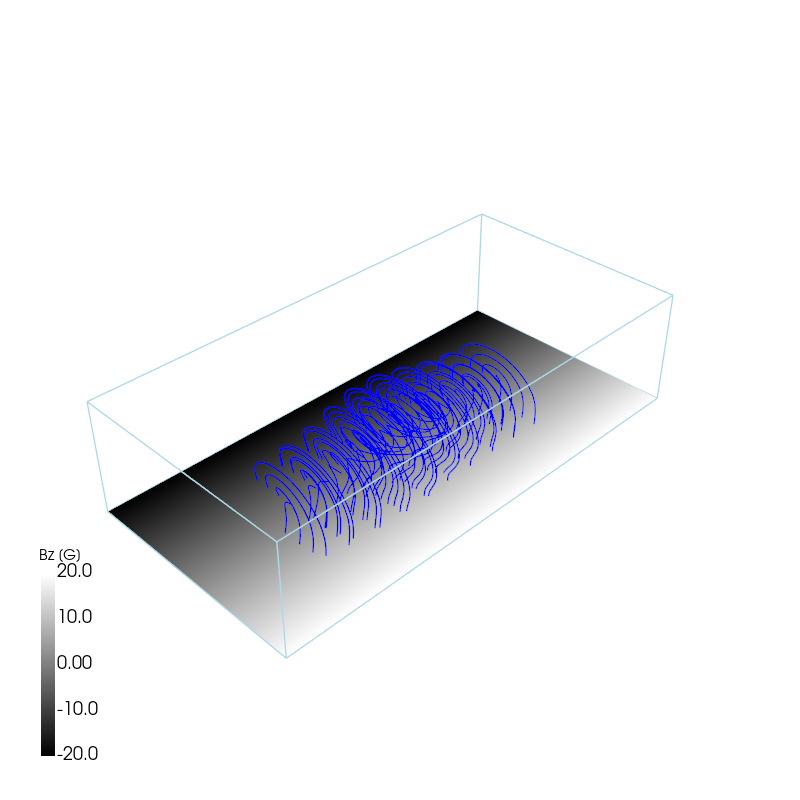

In [ ]:
window_size=(800, 800)
zoom = 0.8

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera.zoom(zoom)
p.show()

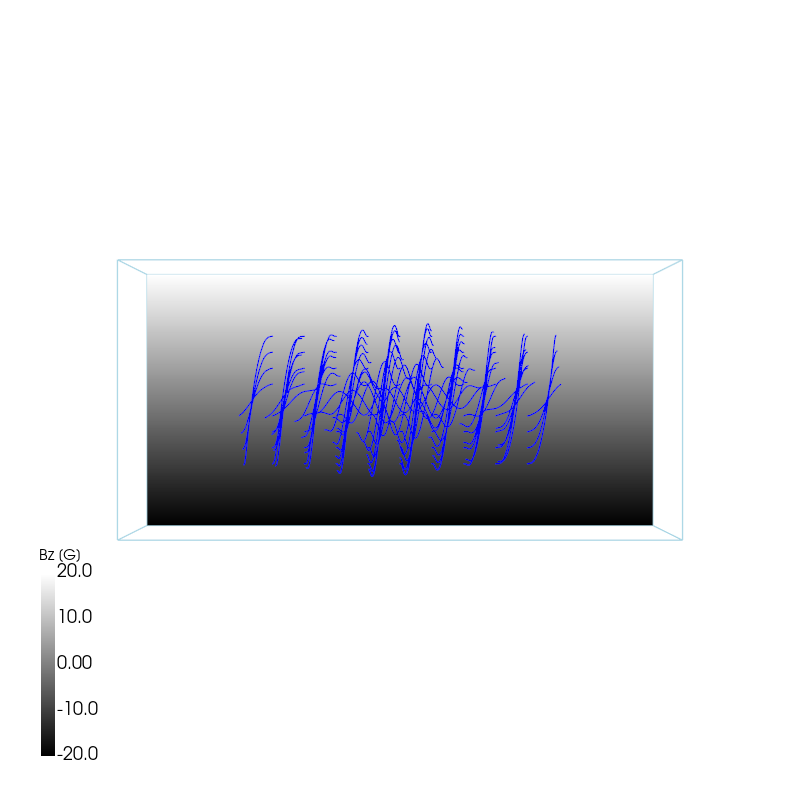

In [ ]:
window_size=(800, 800)
zoom=0.8
camera_position = 'xy'

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = camera_position
p.camera.zoom(zoom)
p.show()

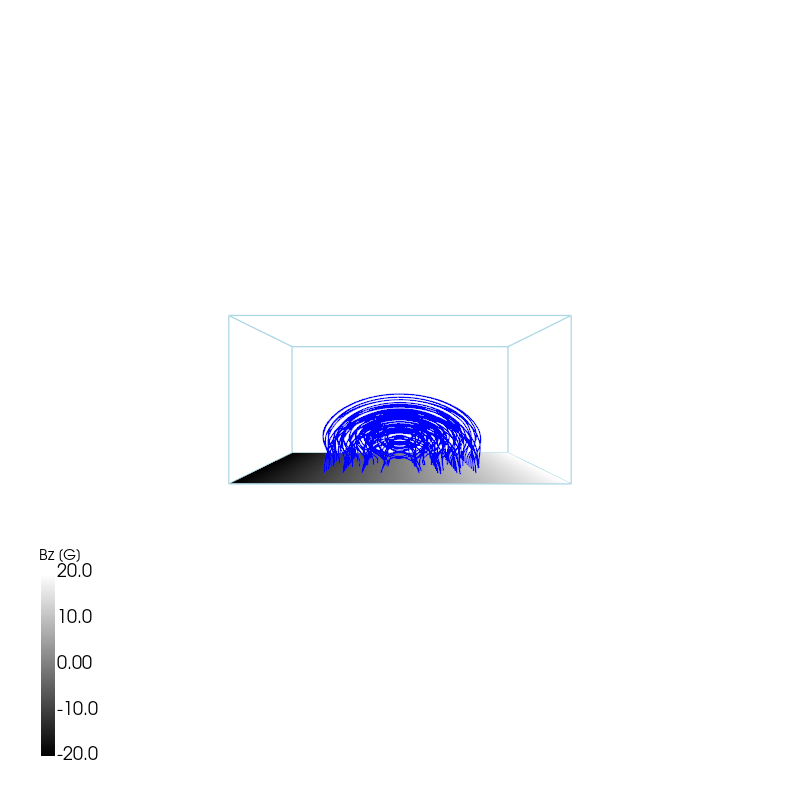

In [ ]:
window_size=(800, 800)
zoom=0.8
camera_position = 'yz'

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = camera_position
p.camera.zoom(zoom)
p.show()

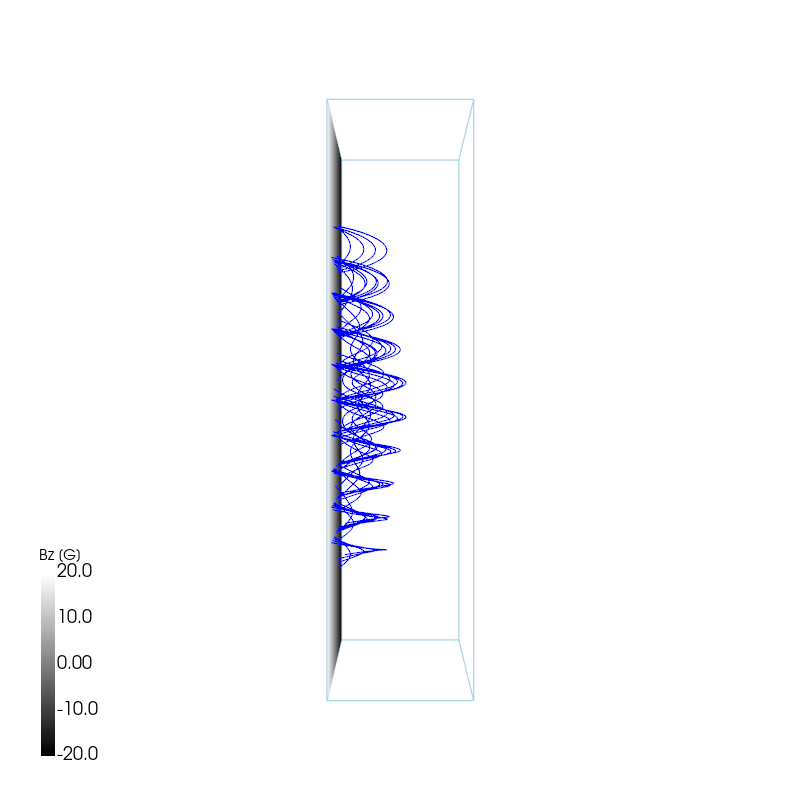

In [ ]:
window_size=(800, 800)
zoom=0.8
camera_position = 'zx'

p = pv.Plotter(off_screen=False, window_size=window_size)
p.add_mesh(b_plot.grid.outline())
p.add_mesh(b_bottom, cmap='gray', **b_dargs)
p.add_mesh(b_tube, lighting=False, color='blue')
p.camera_position = camera_position
p.camera.zoom(zoom)
p.show()